# **Classification**
The problem at hand: The major aim of this project is to predict which of the species pf fish. Therefore, this is a supervised classification problem to be trained with algorithms like:
Logistic Regression
Decision Tree
Random Forest

In [1]:
import pandas as pd

df = pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### **EDA**

In [2]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### **Correlation Plot**

In [6]:
import klib
import matplotlib.pyplot as plt
import seaborn as sns

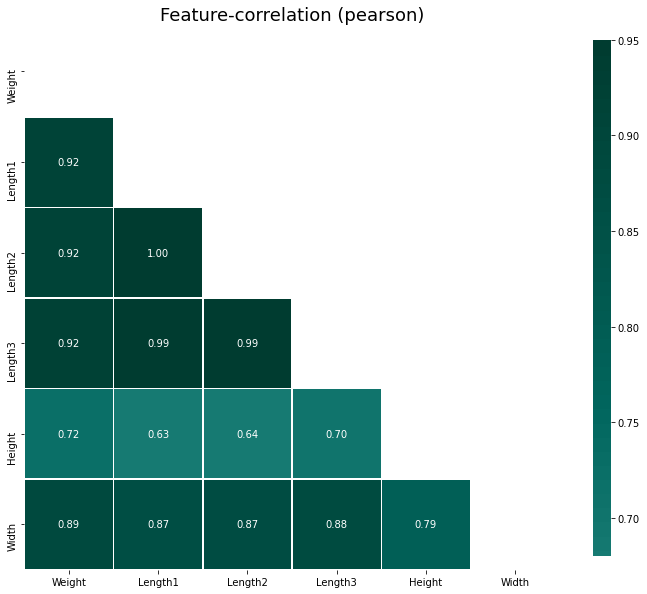

In [7]:
klib.corr_plot(df)

### **Correlation Matrix**

In [8]:
klib.corr_mat(df)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.00,0.92,0.92,0.92,0.72,0.89
Length1,0.92,1.00,1.00,0.99,0.63,0.87
Length2,0.92,1.00,1.00,0.99,0.64,0.87
Length3,0.92,0.99,0.99,1.00,0.70,0.88
Height,0.72,0.63,0.64,0.70,1.00,0.79
Width,0.89,0.87,0.87,0.88,0.79,1.00


### **Categorical Data Plot**

GridSpec(6, 1)

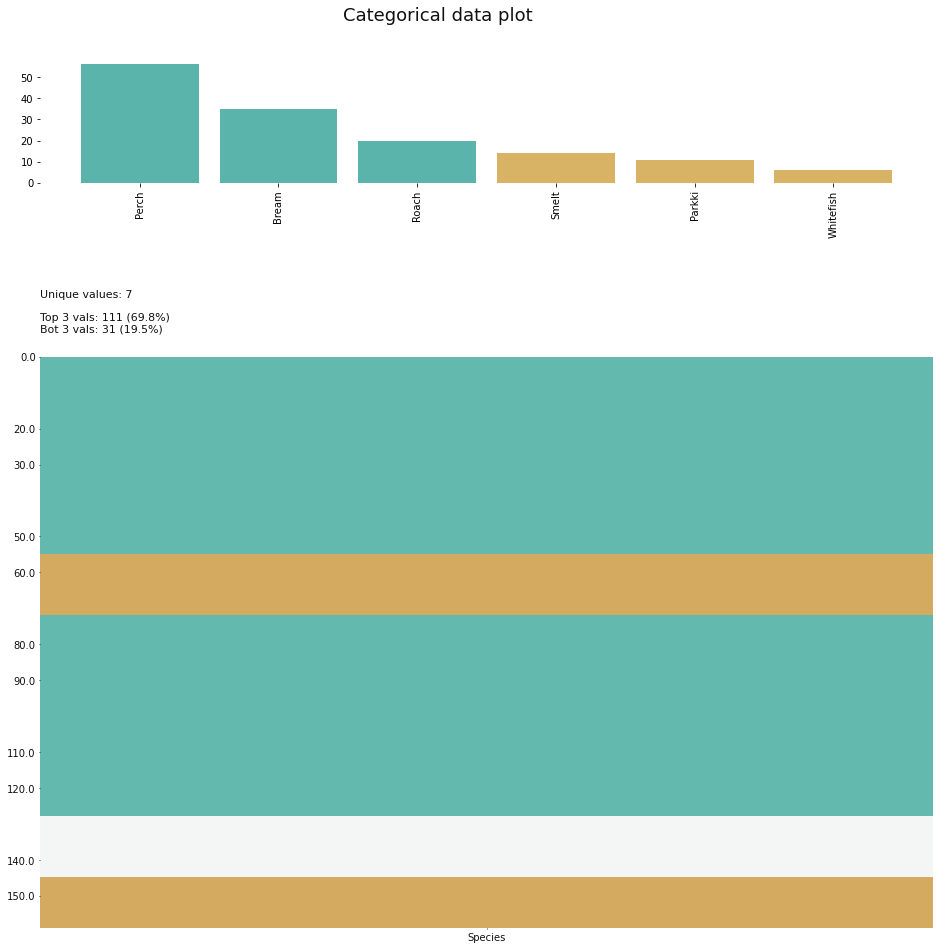

In [9]:
klib.cat_plot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


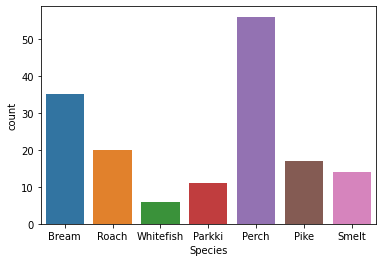

In [17]:
sns.countplot(df['Species'])

### **Distribution Plot**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

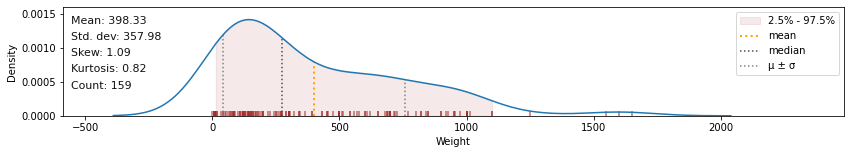

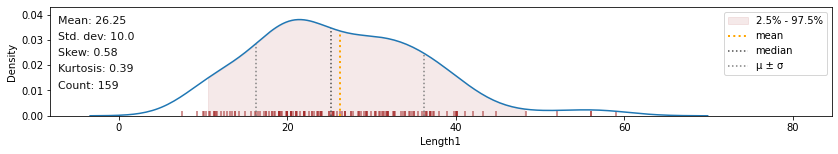

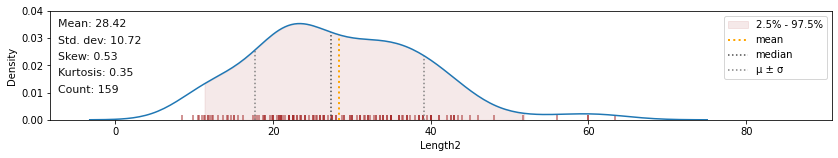

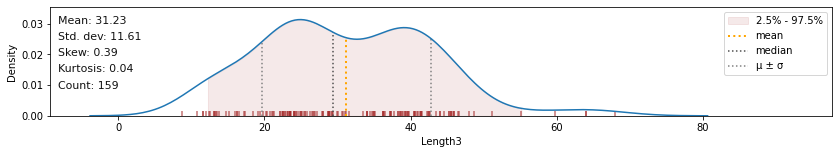

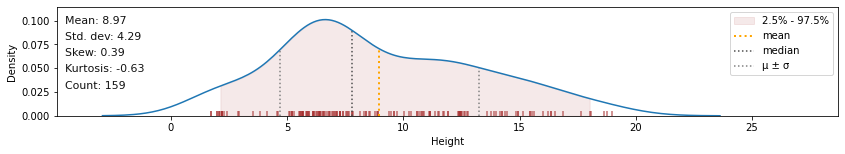

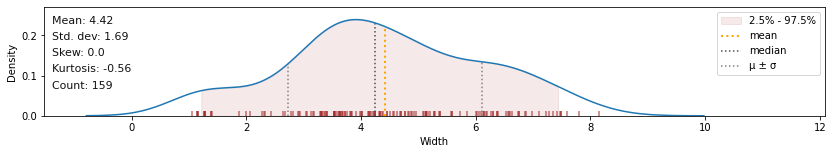

In [11]:
klib.dist_plot(df[['Weight','Length1','Length2','Length3','Height','Width']])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


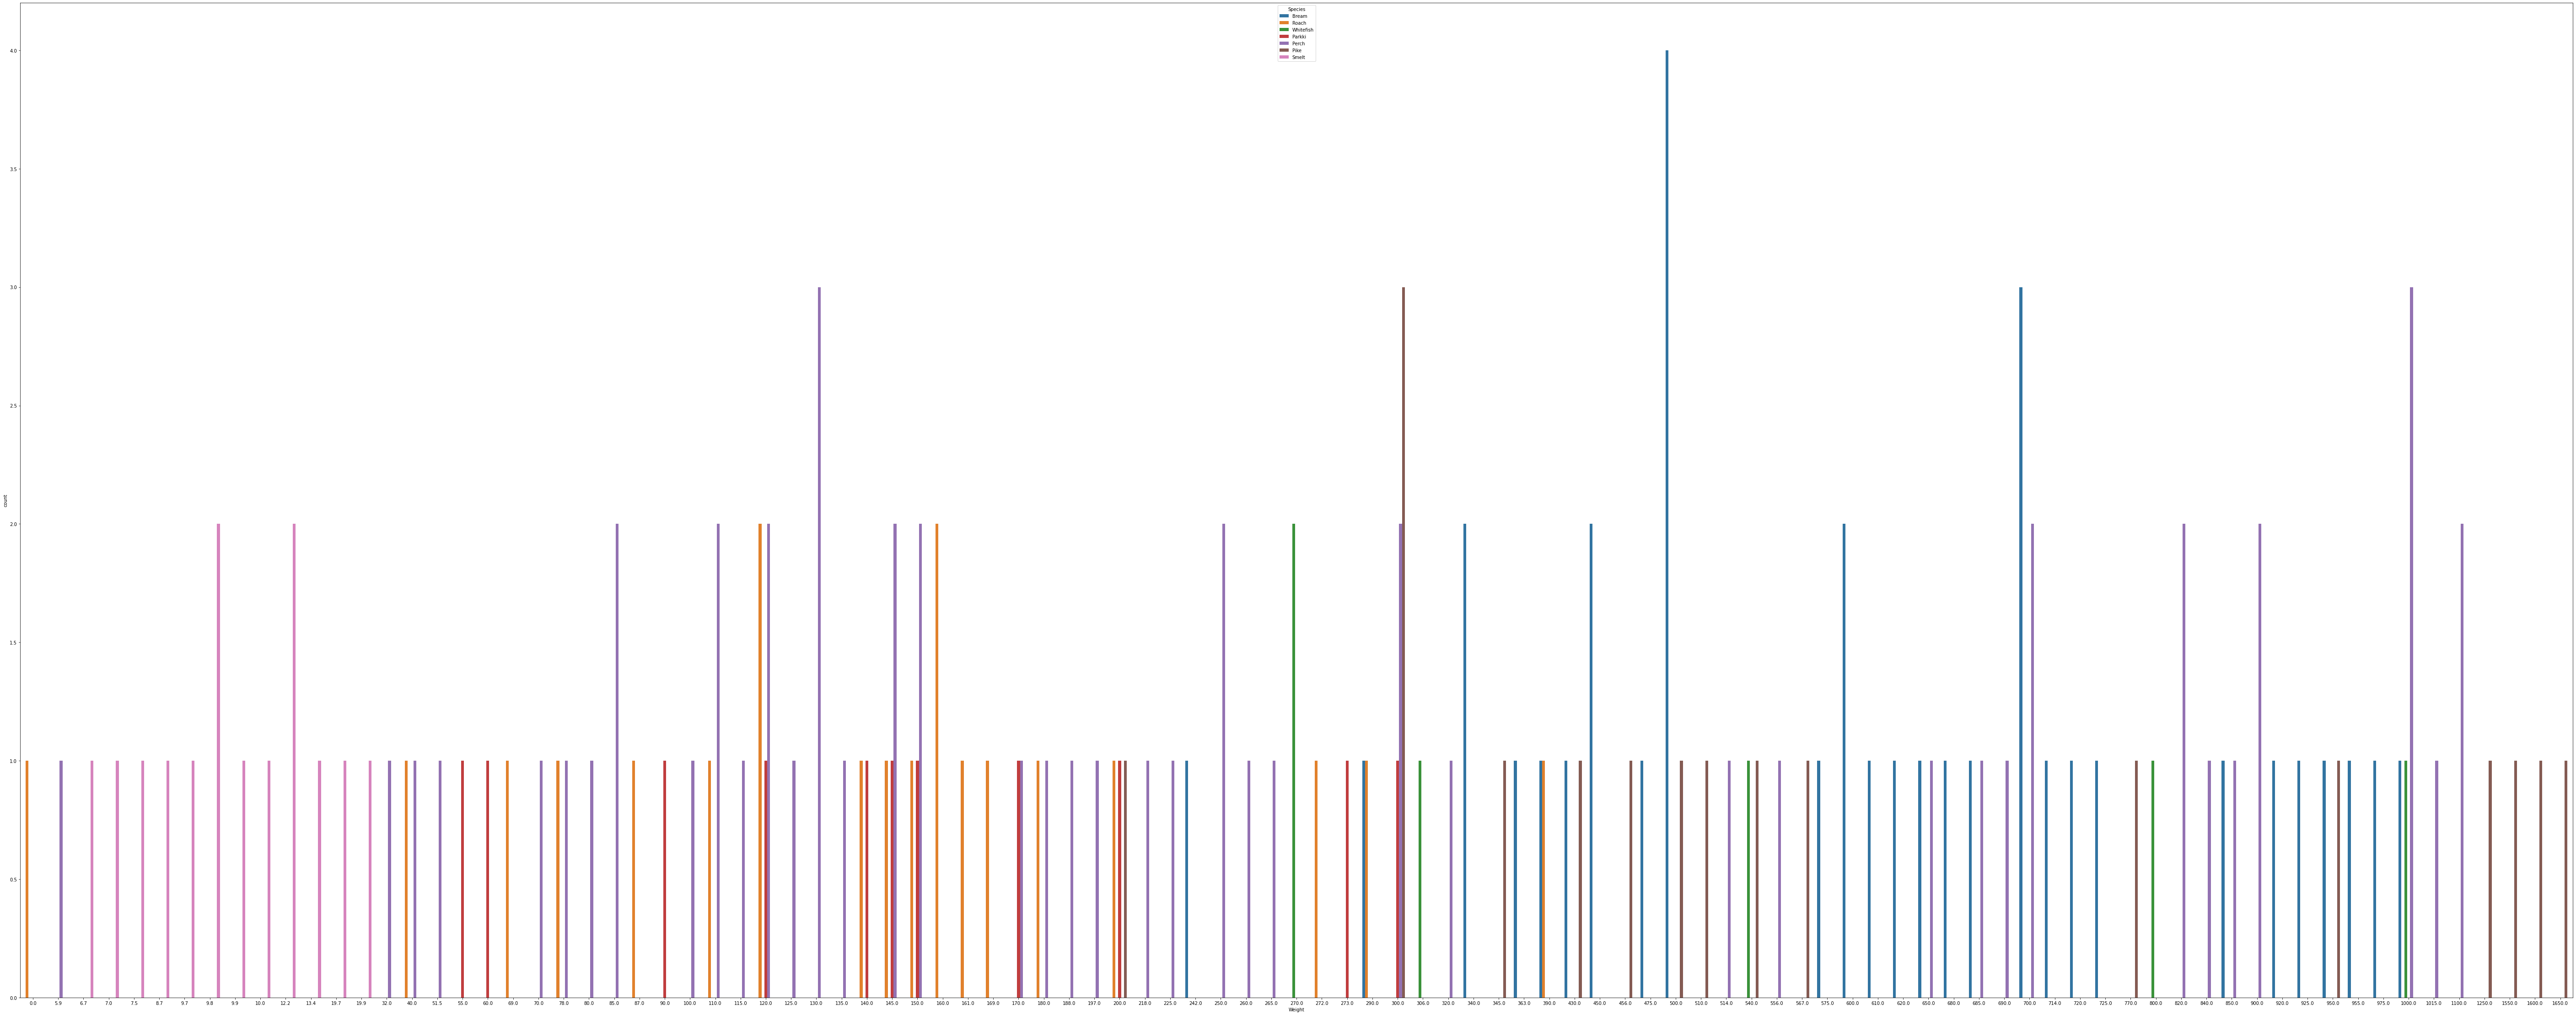

In [16]:
plt.figure(figsize=(100,40))
sns.countplot(df['Weight'], hue=df['Species'], data=df)

### **Data Split**

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
X = df.drop('Species', axis=True)
Y = df['Species']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data Dimension**

In [72]:
X_train.shape, Y_train.shape

((127, 6), (127,))

In [73]:
X_test.shape, Y_test.shape

((32, 6), (32,))

## **Logistic Regression**

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Training Model

In [75]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction on test set

In [64]:
Y_pred = model.predict(X_test)

In [65]:
Y_pred

array(['Bream', 'Smelt', 'Pike', 'Pike', 'Pike', 'Bream', 'Pike', 'Bream',
       'Bream', 'Perch', 'Pike', 'Bream', 'Smelt', 'Pike', 'Bream',
       'Pike', 'Perch', 'Smelt', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Pike', 'Smelt', 'Pike', 'Pike', 'Pike', 'Bream', 'Pike', 'Bream',
       'Pike', 'Pike'], dtype=object)

### Model Performance

In [78]:
print(accuracy_score(Y_test, Y_pred))

0.21875


## **Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier

### Training Model

In [80]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction on test set

In [81]:
Y_pred = model.predict(X_test)
Y_pred

array(['Perch', 'Smelt', 'Perch', 'Roach', 'Bream', 'Roach', 'Perch',
       'Parkki', 'Roach', 'Roach', 'Smelt', 'Roach', 'Perch', 'Roach',
       'Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Bream', 'Perch',
       'Roach', 'Bream', 'Parkki', 'Pike', 'Perch', 'Perch', 'Perch',
       'Pike', 'Smelt', 'Bream', 'Perch'], dtype=object)

### Model Performance

In [83]:
print(accuracy_score(Y_test, Y_pred))

0.71875


## **Random Forest Classifier**

In [85]:
from sklearn.ensemble import RandomForestClassifier

### Training Model

In [90]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Prediction on test set

In [91]:
Y_pred = RF.predict(X_test)
Y_pred

array(['Perch', 'Perch', 'Perch', 'Perch', 'Bream', 'Roach', 'Perch',
       'Parkki', 'Perch', 'Perch', 'Smelt', 'Bream', 'Perch', 'Perch',
       'Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Bream', 'Perch',
       'Whitefish', 'Bream', 'Parkki', 'Pike', 'Perch', 'Perch', 'Perch',
       'Pike', 'Smelt', 'Bream', 'Perch'], dtype=object)

### Model Performance

In [92]:
print(accuracy_score(Y_test, Y_pred))

0.71875
